In [22]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")


url_data = ('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')

dataset = pd.read_csv(url_data)

dataset.info()

print("Missing values for each column:\n", dataset.isnull().sum())
dataset['stalk-root'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [23]:
dataset['stalk-root'].fillna(dataset['stalk-root'].mode()[0], inplace=True)

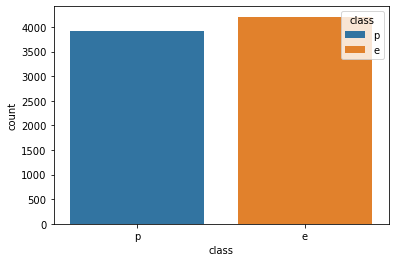

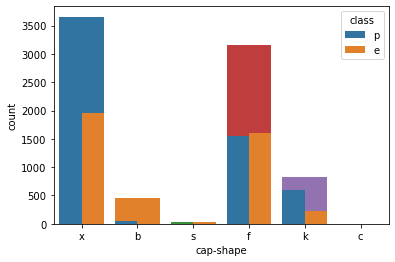

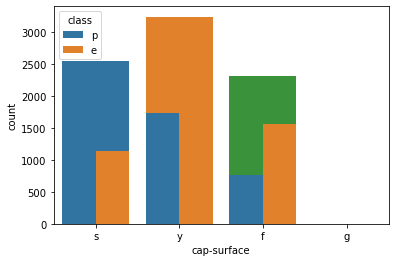

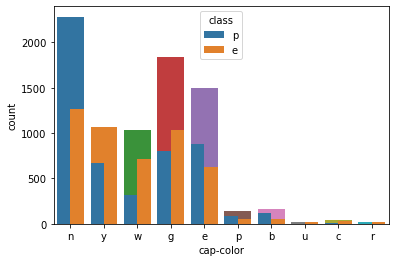

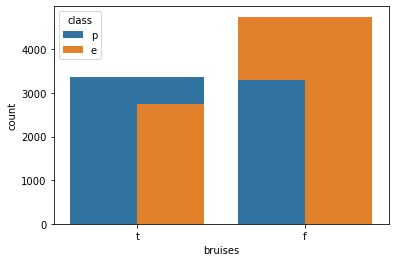

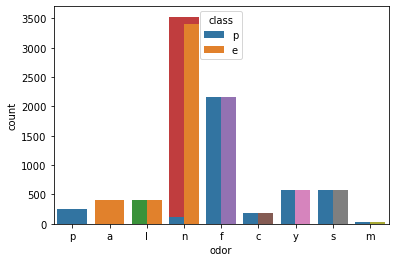

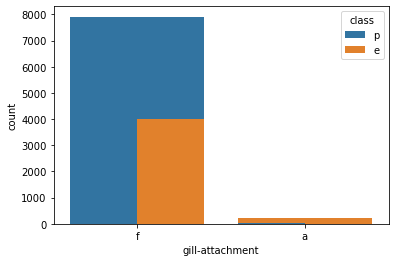

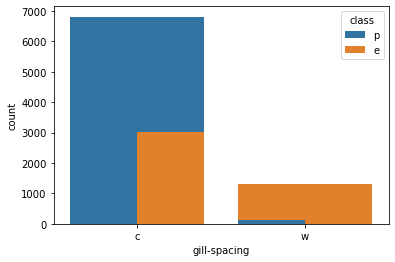

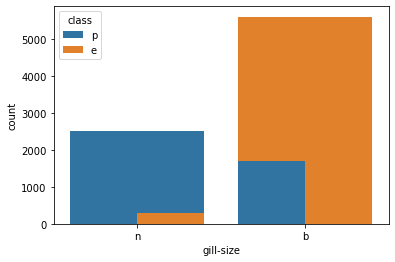

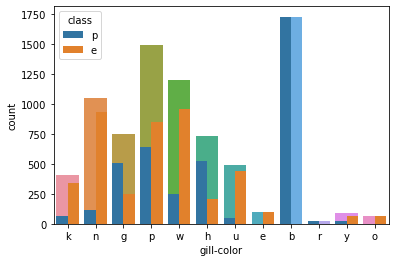

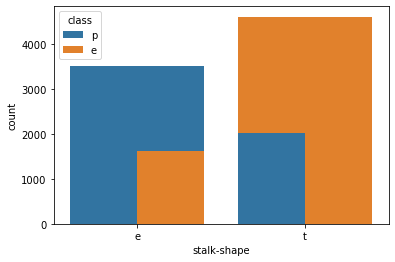

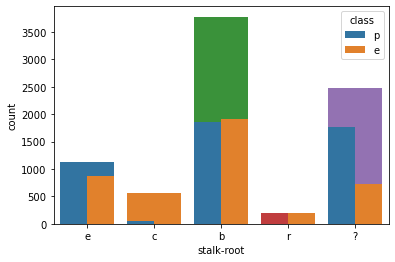

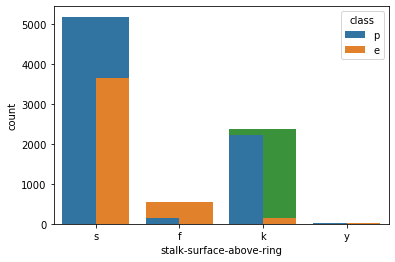

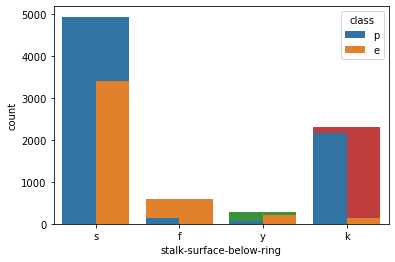

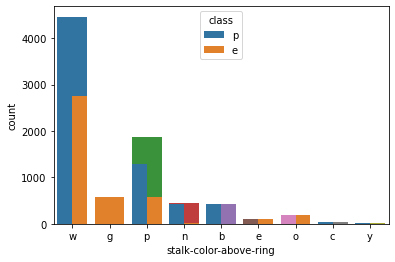

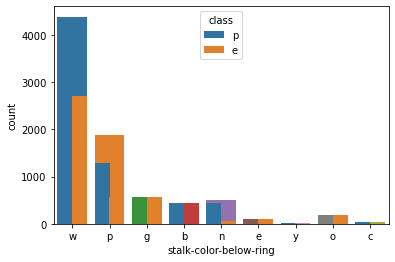

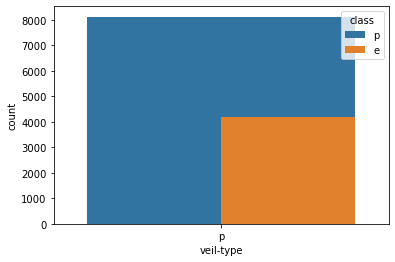

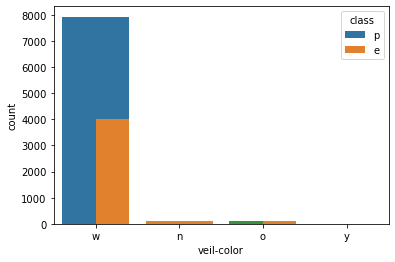

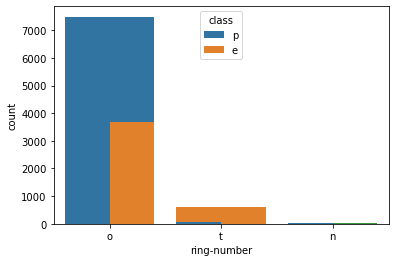

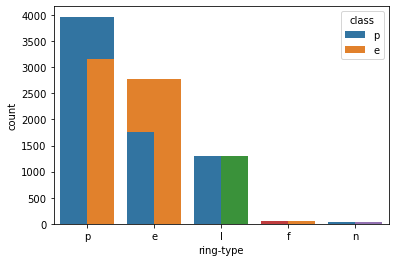

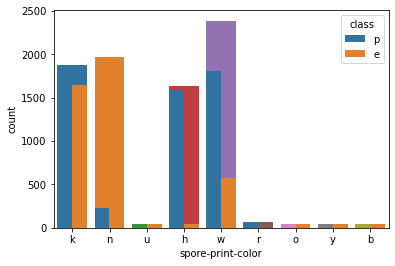

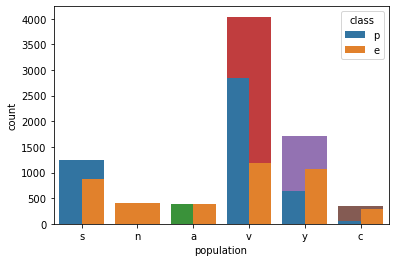

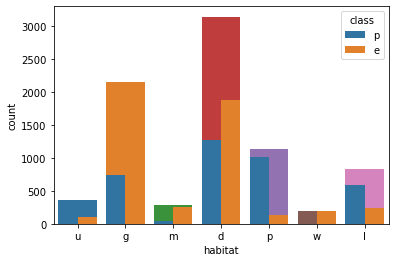

In [11]:
# Data Visualisation
# countplot of every variable
for i, col in enumerate(dataset.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, data=dataset)
    sns_plot.figure.savefig("{} countplot.png".format(col))

# countplot of every variable with hue = class/target
for i, col in enumerate(dataset.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, hue='class', data=dataset)
    sns_plot.figure.savefig("{} class countplot.png".format(col))

In [12]:
# Preprocessing
# get_dummies for all except target variable
dummies_columns = [list(dataset.columns)[i] for i in np.arange(1,23)]
dataset = pd.get_dummies(dataset, columns=dummies_columns)

# Map target variable class: 1 = poisonous, 0 = edible
dataset['class'] = dataset['class'].map({"p": 1, "e": 0})

In [14]:
# Data splitting
# X,y split
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

# Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions x_train dataset:  (6499, 117)
Number transactions y_train dataset:  (6499,)
Number transactions x_test dataset:  (1625, 117)
Number transactions y_test dataset:  (1625,)


In [15]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
# Modelling
# Fitting Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_prob = lr.predict_proba(x_test)[:, 1]
# Classification report and scoring
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

ROC AUC score: 1.0
Accuracy Score:  1.0


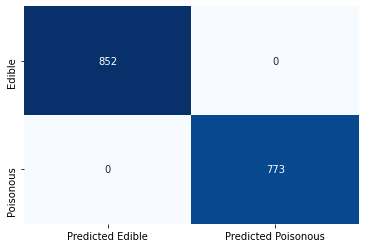

In [20]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Edible', 'Poisonous'],
            xticklabels=['Predicted Edible', 'Predicted Poisonous'])
plt.show()

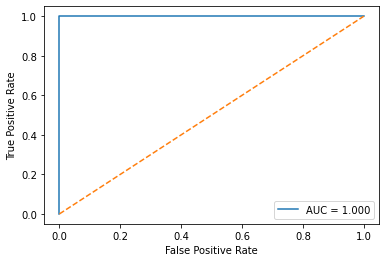

In [21]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()